##**BootCamp: Banco Carrefour Data Engineer**

Atividade (DIO-Análise de dados com Python e Pandas): Análise de dados da planilha em excel, obtendo respostas de algumas perguntas, realizando avaliação da segmentação x vendas e análise via kmeans.

**Nome:** Walison Dias

**Data:** 09/2021

In [155]:
#Importando a biblioteca
import pandas as pd
import matplotlib.pyplot as plt


#Leitura dos arquivos
dfvendas = pd.read_excel("Vendas.xlsx")



In [156]:
dfvendas.head()

,ID-Produto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,ID-Vendedor,Data Venda,ValorVenda
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,2012-10-04,679.00
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-01-01,832.00
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-02-02,790.00
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,2012-03-03,765.32
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,2012-04-04,459.89


In [157]:
dfvendas.dtypes

ID-Produto             object
Produto                object
Categoria              object
Segmento               object
Fabricante             object
Loja                   object
Cidade                 object
Estado                 object
Vendedor               object
ID-Vendedor             int64
Data Venda     datetime64[ns]
ValorVenda            float64
dtype: object

In [158]:
#alterando o tipo de dado da coluna ID-Vendedor
dfvendas['ID-Vendedor'] = dfvendas["ID-Vendedor"].astype('object')

dfvendas.dtypes

ID-Produto             object
Produto                object
Categoria              object
Segmento               object
Fabricante             object
Loja                   object
Cidade                 object
Estado                 object
Vendedor               object
ID-Vendedor            object
Data Venda     datetime64[ns]
ValorVenda            float64
dtype: object

In [159]:
#Consultando linhas com valores faltantes
dfvendas.isnull().sum()

ID-Produto     0
Produto        0
Categoria      0
Segmento       0
Fabricante     0
Loja           0
Cidade         0
Estado         0
Vendedor       0
ID-Vendedor    0
Data Venda     0
ValorVenda     0
dtype: int64

In [160]:
#Quantidade de linhas e colunas
dfvendas.shape


(457, 12)

In [161]:
#Estatistica
dfvendas.describe()

,ValorVenda
count,457.000000
mean,790.111838
std,755.541075
min,12.000000
25%,167.000000
50%,671.000000
75%,1230.000000
max,3999.000000


## **ANÁLISE DOS DADOS DAS VENDAS: EXEMPLO VENDAS LOJAS CARREFOUR**

**1- Qual o valor total das vendas por ano?**

In [162]:
dfvendas.groupby(dfvendas["Data Venda"].dt.year)["ValorVenda"].sum()

Data Venda
2012     37503.74
2013     93418.56
2014     63322.02
2015    166836.79
Name: ValorVenda, dtype: float64

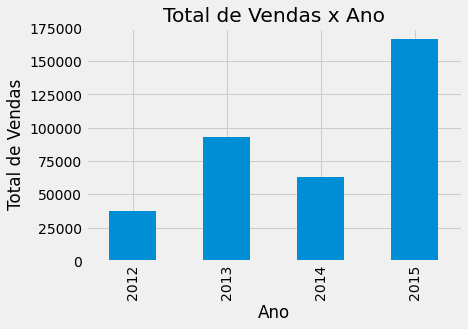

In [163]:
dfvendas.groupby(dfvendas["Data Venda"].dt.year)["ValorVenda"].sum().plot.bar(title="Total de Vendas x Ano")
plt.xlabel("Ano")
plt.ylabel("Total de Vendas");

**2- Qual o total das vendas por estado e segmento?**


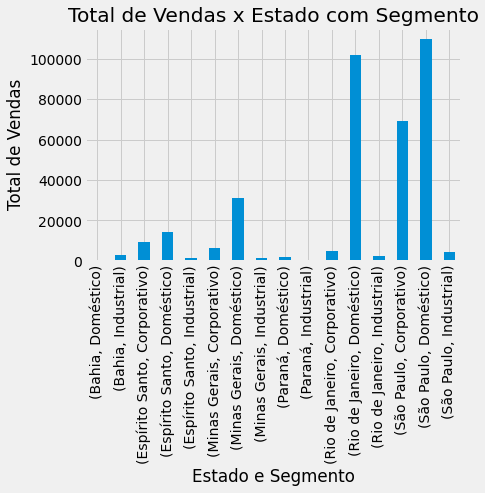

In [164]:
dfvendas.groupby(["Estado","Segmento"])["ValorVenda"].sum().plot.bar(title="Total de Vendas x Estado com Segmento")
plt.xlabel("Estado e Segmento")
plt.ylabel("Total de Vendas");

**3- Qual segmento tem maior influência no valor médio de venda (mean	790.111838)?** 

In [165]:
dfvendas.groupby("Segmento")["ValorVenda"].mean()

Segmento
Corporativo    2193.967073
Doméstico       638.452988
Industrial     1141.363636
Name: ValorVenda, dtype: float64

**4- Em 2015 qual foi o vendedor do mês de Dezembro?**

In [166]:
#Selecionando apenas as vendas de 2015
df2015 = dfvendas[dfvendas["Data Venda"].dt.year == 2015]
#df2015.sample(20)

df122015 = df2015[df2015["Data Venda"].dt.month == 12]
#df122015.tail()

df122015_Total = df2015.groupby("Vendedor")["ValorVenda"].sum().sort_values(ascending=False)
df122015_Total.head(1)

Vendedor
André Pereira    61795.0
Name: ValorVenda, dtype: float64

##**KMEANS DAS VENDAS: EXEMPLO VENDAS LOJAS CARREFOUR**

#**Segmentação e Valores**

In [167]:
from matplotlib import pyplot as plt
import plotly as py
import plotly.graph_objs as go
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [168]:
#CRIANDO VALORES CHAVES ÚNICOS PARA OS SEGMENTOS

#dfvendas.head()
valores_unicos = dfvendas['Segmento'].unique()
total_valores = len(valores_unicos)
mapeamento = dict(zip(valores_unicos, range(total_valores)))
#mapeamento
dfvendas['IDSegmento'] = dfvendas['Segmento'].replace(mapeamento)
dfvendas.head()

,ID-Produto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,ID-Vendedor,Data Venda,ValorVenda,IDSegmento
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,2012-10-04,679.00,0
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-01-01,832.00,1
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-02-02,790.00,1
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,2012-03-03,765.32,1
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,2012-04-04,459.89,1


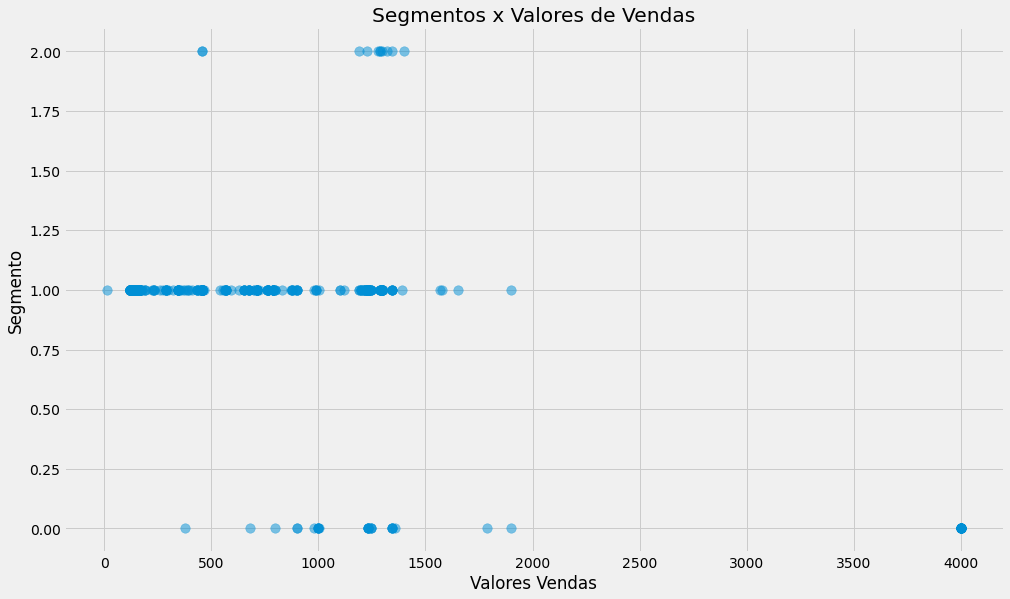

{'Corporativo': 0, 'Doméstico': 1, 'Industrial': 2}

In [169]:
plt.style.use('fivethirtyeight')
plt.figure(1,figsize=[15,9])
plt.scatter(x = 'ValorVenda', y = 'IDSegmento', data = dfvendas, s=90, alpha=0.5)

plt.ylabel('Segmento')
plt.xlabel('Valores Vendas')

plt.title('Segmentos x Valores de Vendas')
plt.show()
mapeamento

#**_kmeans**

EXIBIÇÃO DA CURVA DO COTOVELO, MOSTRANDO AS ITERAÇÕES E O NÚMERO IDEAL DE CLUSTERS

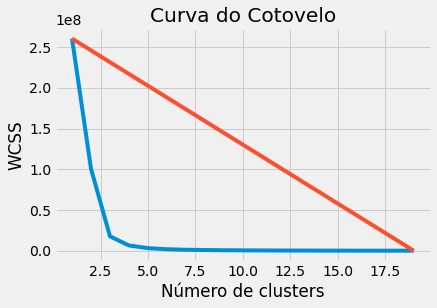

In [170]:
dfx2 = dfvendas[['ValorVenda','IDSegmento']].iloc[:,:].values

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(dfx2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.plot([1,19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Curva do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Os 3 pontos definidos pelo Kmens são:
[[1.17093474e+03 9.22680412e-01]
 [2.98124073e+02 1.00000000e+00]
 [3.99900000e+03 3.33066907e-16]]
17685736.54642999

Gráfico com os pontos:


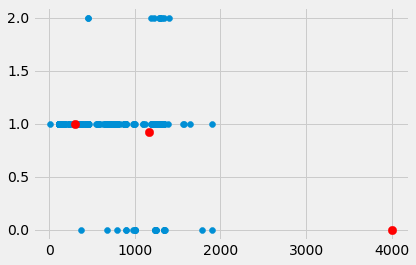

In [171]:
#Insirindo o código que executa o algoritmo k-means com o número ideal de clusters
#Resposta: verificando a Curva do Cotovelo o ponto ideal da Execução do Kmeans é: 3

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(dfx2)

print('Os 3 pontos definidos pelo Kmens são:')
print(kmeans.cluster_centers_)
print(kmeans.inertia_);

print('\nGráfico com os pontos:')
plt.scatter(dfx2[:,0], dfx2[:,1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show;